<a href="https://colab.research.google.com/github/NahiyanNashrah/AI-Lab/blob/main/house_price_using_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [24]:
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)


In [25]:
df['PRICE'] = boston_dataset.target


In [26]:
df.shape

(506, 14)

In [27]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [28]:
X = df.iloc[:,0:13]
Y = df.iloc[:,-1]

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state=5)

In [30]:
X_train.shape

(339, 13)

In [85]:
from keras.models import Sequential
from keras.layers import Dense

In [86]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(13,)),
    Dense(32, activation='relu'),
    Dense(1),
])

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 32)                448       
_________________________________________________________________
dense_35 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 33        
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________


In [87]:
model.compile(optimizer='adam',
              loss='mse')

In [88]:
model.fit(X_train, Y_train,
          validation_data=(X_test, Y_test),
          batch_size = 10, epochs = 400)


Epoch 1/400
34/34 [==============================] - 1s 6ms/step - loss: 883.3125 - val_loss: 135.9148
Epoch 2/400
34/34 [==============================] - 0s 2ms/step - loss: 99.9769 - val_loss: 88.3565
Epoch 3/400
34/34 [==============================] - 0s 7ms/step - loss: 63.5347 - val_loss: 80.7159
Epoch 4/400
34/34 [==============================] - 0s 2ms/step - loss: 57.5525 - val_loss: 77.9122
Epoch 5/400
34/34 [==============================] - 0s 3ms/step - loss: 54.5047 - val_loss: 76.4702
Epoch 6/400
34/34 [==============================] - 0s 2ms/step - loss: 53.6844 - val_loss: 78.7953
Epoch 7/400
34/34 [==============================] - 0s 2ms/step - loss: 61.4898 - val_loss: 74.2686
Epoch 8/400
34/34 [==============================] - 0s 3ms/step - loss: 51.8820 - val_loss: 73.7707
Epoch 9/400
34/34 [==============================] - 0s 2ms/step - loss: 54.8633 - val_loss: 71.0424
Epoch 10/400
34/34 [==============================] - 0s 2ms/step - loss: 51.7134 - val_l

In [89]:
Y_pred = model.predict(X_test)

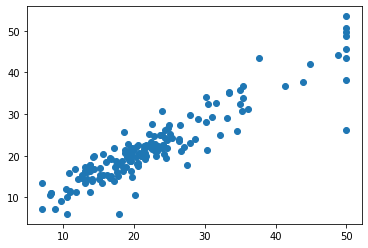

In [90]:
plt.scatter(Y_test, Y_pred)
plt.xlabel = 'Prices'
plt.ylabel = 'Predicted Prices'
plt.title = 'Prices Vs Predicted Prices'
plt.show()

In [91]:
from sklearn.metrics import r2_score

print('R-squared Error:', r2_score(Y_test, Y_pred))

R-squared Error: 0.8436935143268346


In [96]:
y = np.array(Y_test)
y_p = np.array(Y_pred).flatten()
df = pd.DataFrame({"test": y, "predictions": y_p})
df.head(100)


,test,predictions
0,37.6,43.360844
1,27.9,29.800735
2,22.6,21.724615
3,13.8,11.182920
4,35.2,30.621613
...,...,...
95,25.0,27.396187
96,15.6,20.468431
97,26.6,21.028505
98,22.4,23.168909
